 ### Python scripts used for the paper entitled:
 #### Single character insertion-deletion model preserves long indels in ancestral sequence reconstruction

In [2]:
## Python 3
# Long indel situation: Indel Pattern Plots for INDELible simulation
# Created by:  Gholamhossein Jowkar <jowk@zhaw.ch>
# ACGT ZHAW
# Created date: Nov 2023
# Modified by: jowk
# Modified date: 

In [1]:
import os, sys, time, statistics, json, re, fnmatch
from collections import Counter
from statistics import mean

from Bio import AlignIO, SeqIO
from Bio.Align import MultipleSeqAlignment

from ete3 import Tree

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc

path = "./" #path to the data directory
os.chdir(path)

# Setting the styles
sns.set_style('white')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
color_1 = sns.color_palette()[0]
color_2 = sns.color_palette()[1]

## Summary statistics

### The summary statistics extracted from the simulated data set:
    The dimension of data is 990

In [2]:
max_rec_len = 0
arg_max= ''
min_rec_len = 10000
arg_min=''
for file in os.listdir('./Simulation/input/'):
    if file.endswith('_indelible.fas'):
        seqs = SeqIO.parse(f'./Simulation/input/{file}', 'fasta')
        for rec in seqs.records:
            len_rec = len(rec)
            if len_rec>max_rec_len:
                max_rec_len = len_rec
                arg_max = file.split('_')[0]
            elif len_rec<min_rec_len:
                min_rec_len = len_rec
                arg_min = file.split('_')[0]

print("The OMA group %s with length of %s has the maximum sequence length" %(arg_max, max_rec_len))
print("The OMA group %s with length of %s has the minimum sequence length" %(arg_min, min_rec_len))

The OMA group 964636 with length of 1371 has the maximum sequence length
The OMA group 813654 with length of 786 has the minimum sequence length


Change the directory again:

In [ ]:
path = "./simulation_data/" #path to the scripts directory
os.chdir(path)

In [3]:
with open('./03_gap_len_pr_oma_pr_spc_filtered.json', 'r') as josn_file:
    data = json.load(josn_file)

max_len = 0
arg_max= ''
min_len = 10000
arg_min=''

for oma_name, gap_elements in data.items():
#     print(f'OMA: {oma_name}')
    lst_taxa_gap_len = []
    for key, value in gap_elements.items():
        if value:
            if max(value)>max_len:
                max_len = max(value)
                arg_max = oma_name
            elif min(value)<min_len:
                min_len = min(value)
                arg_min = oma_name
            
print("The OMA group %s with length of %s has the maximum gap length" %(arg_max, max_len))
print("The OMA group %s with length of %s has the minimum gap length" %(arg_min, min_len))      

The OMA group 993694 with length of 235 has the maximum gap length
The OMA group 1000131 with length of 1 has the minimum gap length


In [4]:
# Load the data
spc_df = pd.read_csv('./03_spc_df.csv')
# rename the first column
spc_df['species'] = ['Mouse', 'Rattus', 'Chimpanzee', 'Human', 'Gorilla', 'Macaque', 
                    'Murinae', 'Hominini', 'Homininae', 'Catarrhini', 'Euarchontoglires']
display(spc_df)

,Unnamed: 0,number_insertion,number_deletion,number_gap_char,number_gap_len,species
0,Mus,12363,9037,96228,30440,Mouse
1,Rattus,13013,10511,97052,30329,Rattus
2,Pan,3177,2869,98823,30818,Chimpanzee
3,Homo,1638,1505,98998,30834,Human
4,Gorilla,6492,5861,98510,30608,Gorilla
5,Macaca,7798,5442,98551,30641,Macaque
6,V2,28944,7848,99554,31957,Murinae
7,V5,473,463,99131,30897,Hominini
8,V7,4860,3094,99141,30910,Homininae
9,V9,41892,22149,100907,31511,Catarrhini


In [5]:
spc_df['indel_bias'] = spc_df['number_insertion']/spc_df['number_deletion']
spc_df

,Unnamed: 0,number_insertion,number_deletion,number_gap_char,number_gap_len,species,indel_bias
0,Mus,12363,9037,96228,30440,Mouse,1.368042
1,Rattus,13013,10511,97052,30329,Rattus,1.238036
2,Pan,3177,2869,98823,30818,Chimpanzee,1.107354
3,Homo,1638,1505,98998,30834,Human,1.088372
4,Gorilla,6492,5861,98510,30608,Gorilla,1.107661
5,Macaca,7798,5442,98551,30641,Macaque,1.432929
6,V2,28944,7848,99554,31957,Murinae,3.688073
7,V5,473,463,99131,30897,Hominini,1.021598
8,V7,4860,3094,99141,30910,Homininae,1.570782
9,V9,41892,22149,100907,31511,Catarrhini,1.891372


### The summary statistics of indel events

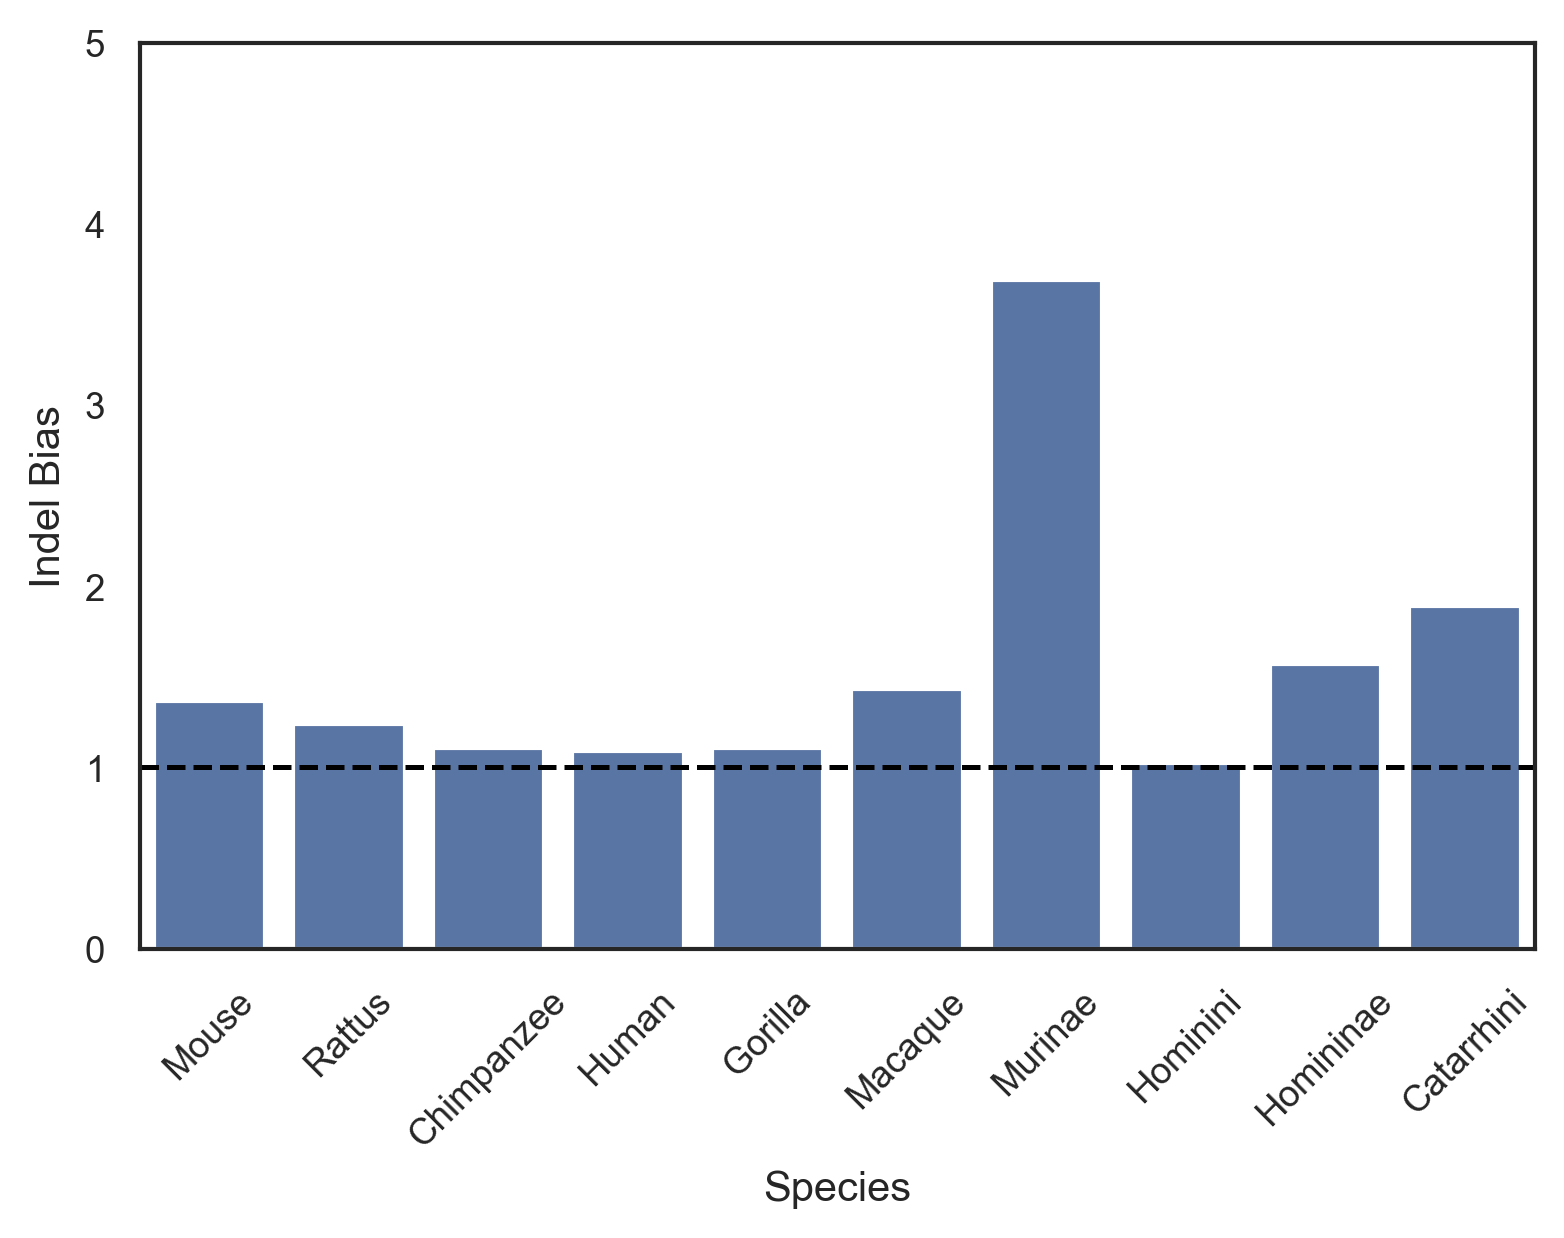

In [6]:
ax = sns.barplot(data=spc_df[:-1], x='species', y='indel_bias', color=color_1, lw=1, dodge=True)
ax.axhline(y=1, ls='--', color='black')
ax.set(xlabel=None, ylabel=None)
ax.set(ylim=[0,5])
ax.set_ylabel(ylabel='Indel Bias',fontsize=10)
ax.set_xlabel('Species', fontsize=10)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()